#Licende-Plate Dataset

Datenset für das Training der OCR-Erkennung

In [42]:
import imgaug as ia
from imgaug import augmenters as iaa
from pyimagesearch.preprocessing import RandomRotatePreprocessor
from pyimagesearch.preprocessing import RandomGaussianNoisePreprocessor
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from scipy import misc
from skimage import data
ia.seed(1)



In [57]:
# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
#img1 = cv2.imread("D:/development/cv/ANPR-keras/images/KC-B41478.png")
#img2 = cv2.imread("D:/development/cv/ANPR-keras/images/test3.png")

images = []
data_root = "D:/development/cv/ANPR-keras/images/"
images_path = os.listdir(data_root)
for image in list(images_path):
    image_file = os.path.join(data_root, image)
    images.append(cv2.imread(image_file))

images = np.darray(images)

#images = [img1, img2]
#images = np.array([img1, img2], dtype=np.uint8)

seq = iaa.Sequential([
    #iaa.Fliplr(0.5), # horizontal flips
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.02, 0.02), "y": (-0.02, 0.02)},
        rotate=(-20, 20),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq.augment_images(images)

cols = 1
n_images = len(images_aug)
   
fig = plt.figure()

for n, image in enumerate(images_aug):
    a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
    plt.axis("off")
    plt.imshow(image)
    a.set_title('Image (%d)' % (n+1))

fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()
    
#plt.axis("off")
#plt.imshow(images_aug[0], cmap='gray')
#plt.show()



TypeError: only integer scalar arrays can be converted to a scalar index

In [31]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

data = aug.flow(trainX, trainY, batch_size=32)


NameError: name 'trainX' is not defined

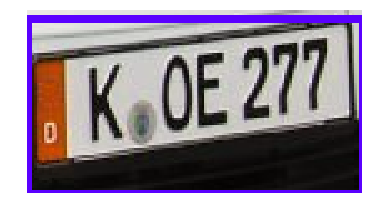

In [94]:
img = cv2.imread("D:/development/cv/ANPR-keras/images/test1.png")

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.waitKey(0)

#binarize 
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#cv2.waitKey(0)

#find contours
im2,ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]

    # show ROI
    cv2.imwrite('D:/development/cv/ANPR-keras/images/roi_imgs.png', roi)
    cv2.imshow('charachter'+str(i), roi)
    cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    #cv2.waitKey(0)


plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

[array([[[119,   3]],

       [[118,   4]],

       [[112,   4]],

       [[111,   5]],

       [[103,   5]],

       [[102,   6]],

       [[ 96,   6]],

       [[ 95,   7]],

       [[ 89,   7]],

       [[ 88,   8]],

       [[ 78,   8]],

       [[ 77,   9]],

       [[ 71,   9]],

       [[ 70,  10]],

       [[ 64,  10]],

       [[ 63,  11]],

       [[ 55,  11]],

       [[ 54,  12]],

       [[ 48,  12]],

       [[ 47,  13]],

       [[ 41,  13]],

       [[ 40,  14]],

       [[ 29,  14]],

       [[ 28,  15]],

       [[ 21,  15]],

       [[ 20,  16]],

       [[ 11,  16]],

       [[ 10,  17]],

       [[  3,  17]],

       [[  2,  18]],

       [[  1,  18]],

       [[  0,  19]],

       [[  0,  72]],

       [[133,  72]],

       [[133,  43]],

       [[132,  43]],

       [[131,  42]],

       [[131,  35]],

       [[130,  34]],

       [[130,  14]],

       [[129,  13]],

       [[129,   5]],

       [[128,   4]],

       [[128,   3]]], dtype=int32)]


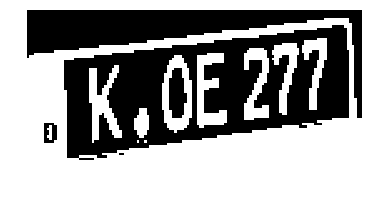

In [54]:
image = image = cv2.imread("D:/development/cv/ANPR-keras/images/test1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#binarize 
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

im2, ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

print(sorted_ctrs)

#gray_image = cv2.resize(gray_image, (160, 32))
#thresh = 127
#im_bw = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)[1]
plt.axis("off")
plt.imshow(thresh, cmap='gray')
plt.show()

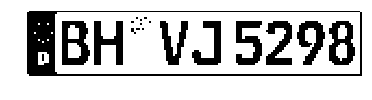

In [34]:
(thresh, im_bw) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#thresh = 127
#im_bw = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)[1]
plt.axis("off")
plt.imshow(im_bw, cmap='gray')
plt.show()

##DatasetLoader

Lädt die vom DatasetGenerator erzeugten Trainings- und Testdaten

Vom DataSetGenerator erzeugtes Originalbild 
Das vom Web-Service erzeugte Originalbild wurde bereits in ein Graubild gewandelt und um den Faktor 0.3 verkleinert, dass es etwa 160 x 32 Pixel hat

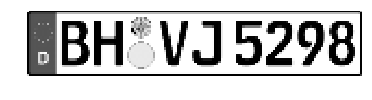

In [35]:
image = image = cv2.imread("D:/development/cv/ANPR-keras/data/train/BH-VJ5298.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.show()

Das Größe wird auf exakt 160 x 32 gesetzt, da das OCR-Model mit dieser Input-Größe trainiert wurde




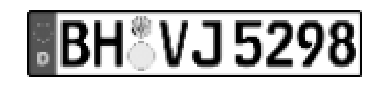

In [36]:
gray_image = cv2.resize(gray_image, (160, 32))
plt.axis("off")
plt.imshow(gray_image, cmap='gray')
plt.show()

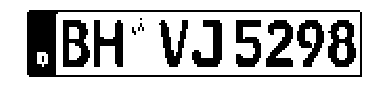

In [37]:
(thresh, im_bw) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#thresh = 127
#im_bw = cv2.threshold(gray_image, thresh, 255, cv2.THRESH_BINARY)[1]
plt.axis("off")
plt.imshow(im_bw, cmap='gray')
plt.show()

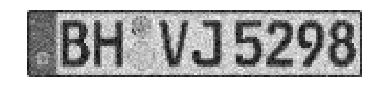

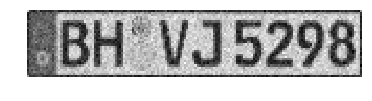

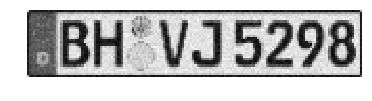

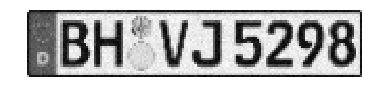

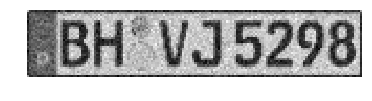

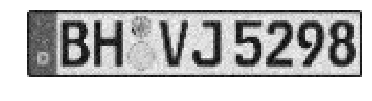

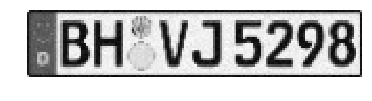

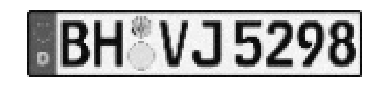

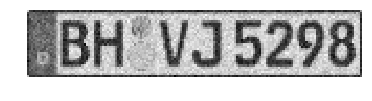

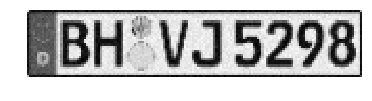

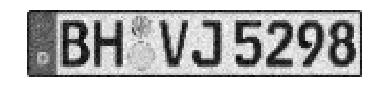

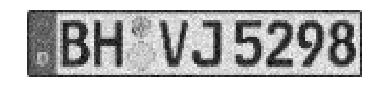

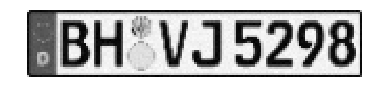

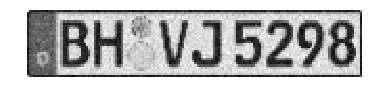

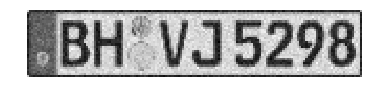

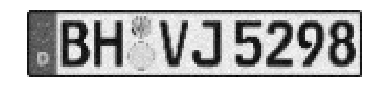

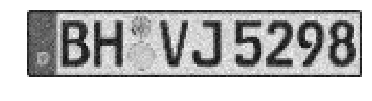

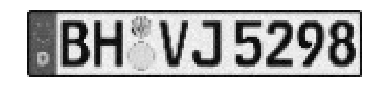

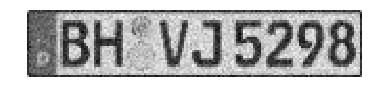

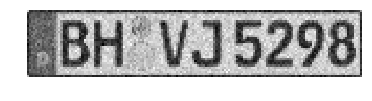

In [38]:
np = RandomGaussianNoisePreprocessor(25)

for i in range(20):
    image = np.preprocess(gray_image)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()

Da sich die Kamera nicht immer exakt hinter dem Nummernschild befindet, sonder leicht seitlich, sind die Nummernschilder meist leicht schräg...

Um das zu simulieren, werden die Bilder daher zufälling leicht rotiert

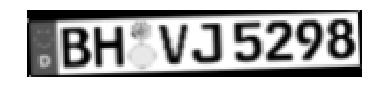

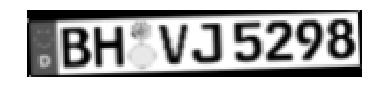

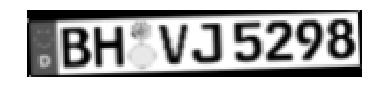

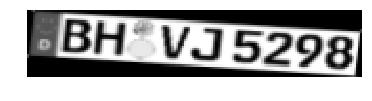

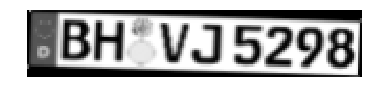

In [39]:
rp = RandomRotatePreprocessor(-5, 5, gray_image.shape[:2][1], gray_image.shape[:2][0])

for i in range(5):
    image = rp.preprocess(gray_image)
    plt.axis("off")
    plt.imshow(image, cmap='gray')
    plt.show()

Preprocessing-Pipeline

=> Reihenfolge abhängig, nicht reversibel

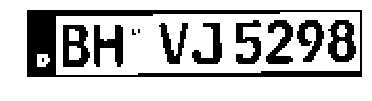

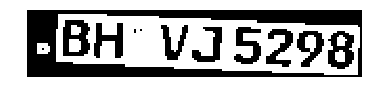

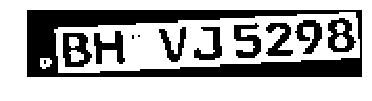

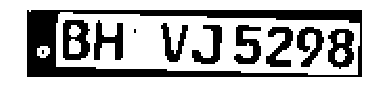

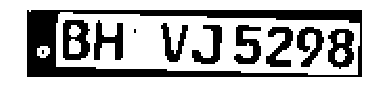

In [45]:
np = RandomGaussianNoisePreprocessor(15)
rp = RandomRotatePreprocessor(-5, 5, gray_image.shape[:2][1], gray_image.shape[:2][0])
  
for i in range(5):
    image = rp.preprocess(gray_image)
    #image = np.preprocess(image)  
    thresh = 127
    im_bw = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)[1]
    plt.axis("off")
    plt.imshow(im_bw, cmap='gray')
    plt.show()
